In [51]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import rich
print = rich.print
print("OpenCV version:", cv2.__version__)

OpenCV version: 4.8.0

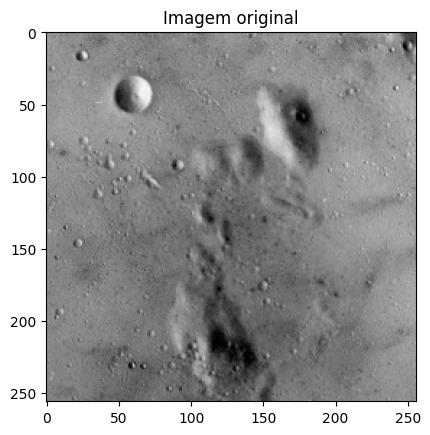

In [52]:
image = cv2.imread("./imgs/5.1.09.tiff")

plt.imshow(image)
plt.title("Imagem original")
plt.show()

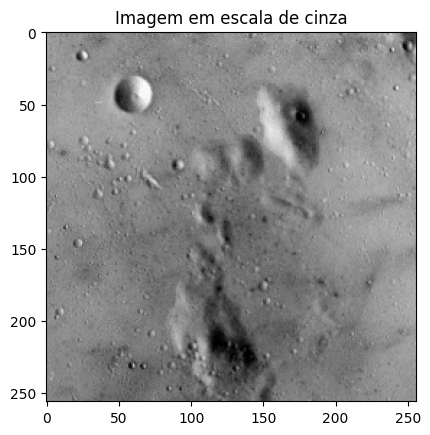

In [53]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="gray")
plt.title("Imagem em escala de cinza")
plt.show()

In [60]:
kernel = [
    [1,8,1],
    [8,-5,8],
    [1,8,1]
]

kernel = np.array(kernel, dtype="float")
kernel_total = np.sum(kernel) 
print("Kernel total:", kernel_total)
print("Kernel:\n", kernel)
print("Kernel shape:", kernel.shape)
kernel = kernel / kernel_total


Kernel total: 31.0

Kernel:
 [[ 1.  8.  1.]
 [ 8. -5.  8.]
 [ 1.  8.  1.]]

Kernel shape:
(3, 3)

In [61]:
width , height = gray.shape
new_image = np.zeros((width+2,height+2), dtype="uint8")
for x in range(1,width-1):
    for y in range(1,height-1):
        #print({
        #    "x": x,
        #    "y": y,
        #    "shape": gray[x-1:x+2,y-1:y+2].shape
        #    })
        new_image[x,y] = np.sum(gray[x-1:x+2,y-1:y+2]*kernel)

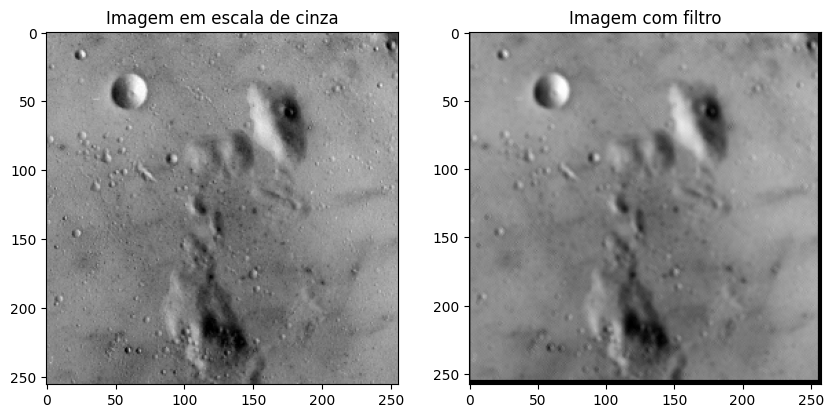

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(10, 7))
axs[0].imshow(gray, cmap="gray")
axs[0].set_title("Imagem em escala de cinza")
axs[1].imshow(new_image, cmap="gray")
axs[1].set_title("Imagem com filtro")
plt.show()